In [46]:
#Import all of the libraries needed

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd 
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os


In [47]:
#Set fast_run to False
FAST_RUN = False

#Set image width and image height
IMAGE_WIDTH=128
IMAGE_HEIGHT=128

#Set the size of the image to be equal to the image width and image height
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

#There are 3 image channels
IMAGE_CHANNELS=3

In [48]:
#Get the filenames
filenames = os.listdir(r"C:\Users\nguyent2\Desktop\Training_1")
categories = []
for filename in filenames:
    category = filename[0]
    if category == "3":
        categories.append("triangle")
    elif category == "4":
        categories.append("square")
    elif category == "5":
        categories.append("pentagon")
    elif category == "6":
        categories.append("hexagon")
    elif category == "7":
        categories.append("heptagon")
    elif category == "8":
        categories.append("octagon")
    elif category == "9":
        categories.append("nonagon")
    else:
        categories.append("decagon")

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

#This line used to shuffle the dataset
df = df.sample(frac=1)


In [49]:
df.to_csv(r"C:\Users\nguyent2\Desktop\New.csv")
df.head()

,filename,category
941,10_sides_946.png,decagon
7071,9_sides_162.png,nonagon
6176,8_sides_257.png,octagon
4959,6_sides_962.png,hexagon
2219,4_sides_296.png,square


In [50]:
df.tail()

,filename,category
5590,7_sides_63.png,heptagon
6015,8_sides_111.png,octagon
7351,9_sides_414.png,nonagon
1584,3_sides_624.png,triangle
7356,9_sides_419.png,nonagon


<AxesSubplot:>

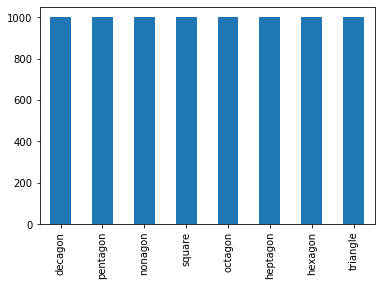

In [51]:
df['category'].value_counts().plot.bar()

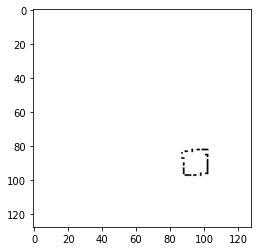

In [52]:
sample = random.choice(filenames)
image = load_img(r"C:\Users\nguyent2\Desktop\Training_1\\" + sample)
plt.imshow(image)

In [53]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<AxesSubplot:>

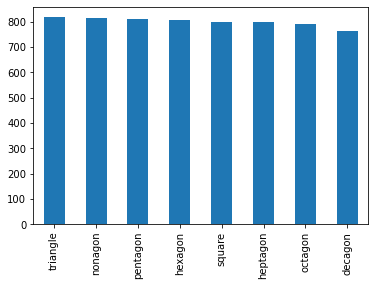

In [54]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

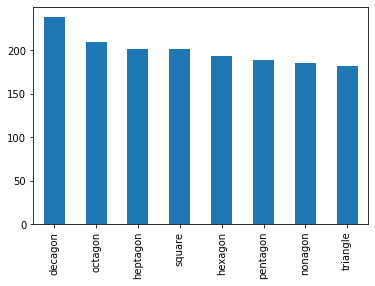

In [55]:
validate_df['category'].value_counts().plot.bar()

In [56]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [57]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, r"C:\Users\nguyent2\Desktop\Training_1", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size= batch_size
)

Found 6400 validated image filenames belonging to 8 classes.


In [58]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    r"C:\Users\nguyent2\Desktop\Training_1", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 1600 validated image filenames belonging to 8 classes.


In [59]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,   r"C:\Users\nguyent2\Desktop\Training_1", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


In [60]:
plt.figure(figsize=(128, 128))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [65]:
# have you tried changing the optimizer or loss function?

# model = Sequential()
# model.add(Conv2D(2,(3,3),activation='relu',input_shape=(128,128,3)))
# model.add(MaxPool2D(2,2))
# model.add(Dropout(0.2))

# model.add(Conv2D(512,(3,3),activation='relu'))
# model.add(MaxPool2D(2,2))
# model.add(Dropout(0.3))

# model.add(Conv2D(1024,(3,3),activation='relu'))
# model.add(MaxPool2D(2,2))
# model.add(Dropout(0.3))

# model.add(Flatten())
# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(8,activation='sigmoid'))

# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(8, activation = "softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 126, 126, 2)       56        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 63, 63, 2)         0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 63, 63, 2)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7938)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1016192   
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                

In [66]:
# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [67]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [68]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=[early_stop]
)

Epoch 1/50
426/426 [==============================] - 58s 136ms/step - loss: 0.4235 - accuracy: 0.1400 - val_loss: 0.4028 - val_accuracy: 0.1818
Epoch 2/50
426/426 [==============================] - 35s 83ms/step - loss: 0.3762 - accuracy: 0.1649 - val_loss: 0.3827 - val_accuracy: 0.1874
Epoch 3/50
426/426 [==============================] - 34s 79ms/step - loss: 0.3732 - accuracy: 0.1850 - val_loss: 0.3891 - val_accuracy: 0.1818
Epoch 4/50
426/426 [==============================] - 35s 83ms/step - loss: 0.3719 - accuracy: 0.1926 - val_loss: 0.4057 - val_accuracy: 0.1761


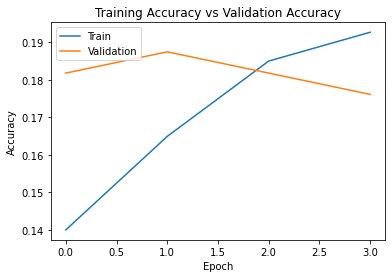

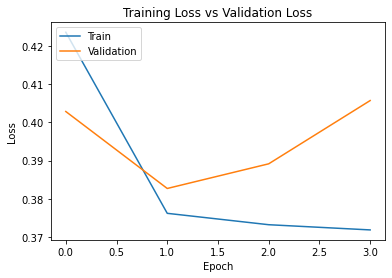

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [70]:
test_filenames = os.listdir(r"C:\Users\nguyent2\Desktop\Training_1")

test_df = pd.DataFrame({
    'filename': test_filenames
})
test_df = test_df.sample(frac=1)

nb_samples = test_df.shape[0]

In [71]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    r"C:\Users\nguyent2\Desktop\Training_1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 8000 validated image filenames.


In [72]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df.to_csv(r"C:\Users\nguyent2\Desktop\New_2.csv")

In [ ]:
test_df['category'].value_counts().plot.bar()

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
i = 0
for index, row in sample_test.iterrows():
    i +=1
    filename = row['filename']
    category = row['category']
    img = load_img(r"C:\Users\nguyent2\Desktop\Training_1\\"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, i)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()